# ANÁLISIS DESCRIPTIVO

In [222]:
import pandas as pd
import warnings
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.stats import norm
#from explainx import *
#https://github.com/ResidentMario/missingno

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [223]:
df = pd.read_csv('data_modelos.csv')

In [190]:
df.dtypes

rbd                   int64
average_psu         float64
average_nem         float64
ingreso_superior    float64
prom_notas_alu      float64
cod_reg_rbd           int64
cod_pro_rbd           int64
cod_com_rbd           int64
cod_depe2             int64
rural_rbd           float64
cod_ense              int64
cod_jor               int64
cod_des_cur           int64
gen_alu               int64
edad_alu              int64
cod_reg_alu           int64
cod_com_alu           int64
i_vul               float64
dtype: object

In [191]:
#Asimetría y Kurtosis
#print("Skewness: %f" % df_train['SalePrice'].skew())
#print("Kurtosis: %f" % df_train['SalePrice'].kurt())



In [192]:
print ('Numeros de fila: {0}'.format(df.shape[0]))
print ('Numeros de columnas: {0}'.format(df.shape[1]))

Numeros de fila: 229248
Numeros de columnas: 18


In [193]:
columns=df.columns.tolist()

In [194]:
df.describe()

,rbd,average_psu,average_nem,ingreso_superior,prom_notas_alu,cod_reg_rbd,cod_pro_rbd,cod_com_rbd,cod_depe2,rural_rbd,cod_ense,cod_jor,cod_des_cur,gen_alu,edad_alu,cod_reg_alu,cod_com_alu,i_vul
count,229248.000000,229248.000000,229248.000000,229248.000000,229248.000000,229248.000000,229248.000000,229248.000000,229248.000000,229248.000000,229248.000000,229248.000000,229248.000000,229248.000000,229248.000000,229248.000000,229248.000000,229248.000000
mean,12184.587896,485.345852,5.579495,0.696460,5.723654,9.277259,94.740905,9480.680686,1.816408,0.029012,386.648259,2.671147,0.381316,1.514443,18.345211,9.281494,9485.808160,0.713351
std,9108.284121,69.674049,0.232167,0.459787,0.570717,3.823203,37.966181,3799.810671,0.757631,0.167841,107.512734,0.922577,0.609428,0.499801,4.151696,3.844618,3824.047409,0.264599
min,1.000000,262.000000,4.798182,0.000000,0.000000,1.000000,11.000000,1101.000000,1.000000,0.000000,167.000000,1.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000
25%,4778.000000,431.792899,5.415213,0.000000,5.300000,6.000000,61.000000,6108.000000,1.000000,0.000000,310.000000,3.000000,0.000000,1.000000,17.000000,6.000000,6110.000000,0.628537
50%,9903.000000,468.723558,5.558542,1.000000,5.700000,9.000000,92.000000,9201.000000,2.000000,0.000000,310.000000,3.000000,0.000000,2.000000,17.000000,9.000000,9202.000000,0.802335
75%,17812.000000,531.180556,5.713193,1.000000,6.200000,13.000000,131.000000,13119.000000,2.000000,0.000000,410.000000,3.000000,1.000000,2.000000,18.000000,13.000000,13119.000000,0.903353
max,40457.000000,691.133858,6.630000,1.000000,7.000000,15.000000,152.000000,15201.000000,4.000000,1.000000,910.000000,4.000000,3.000000,2.000000,77.000000,15.000000,15202.000000,1.000000


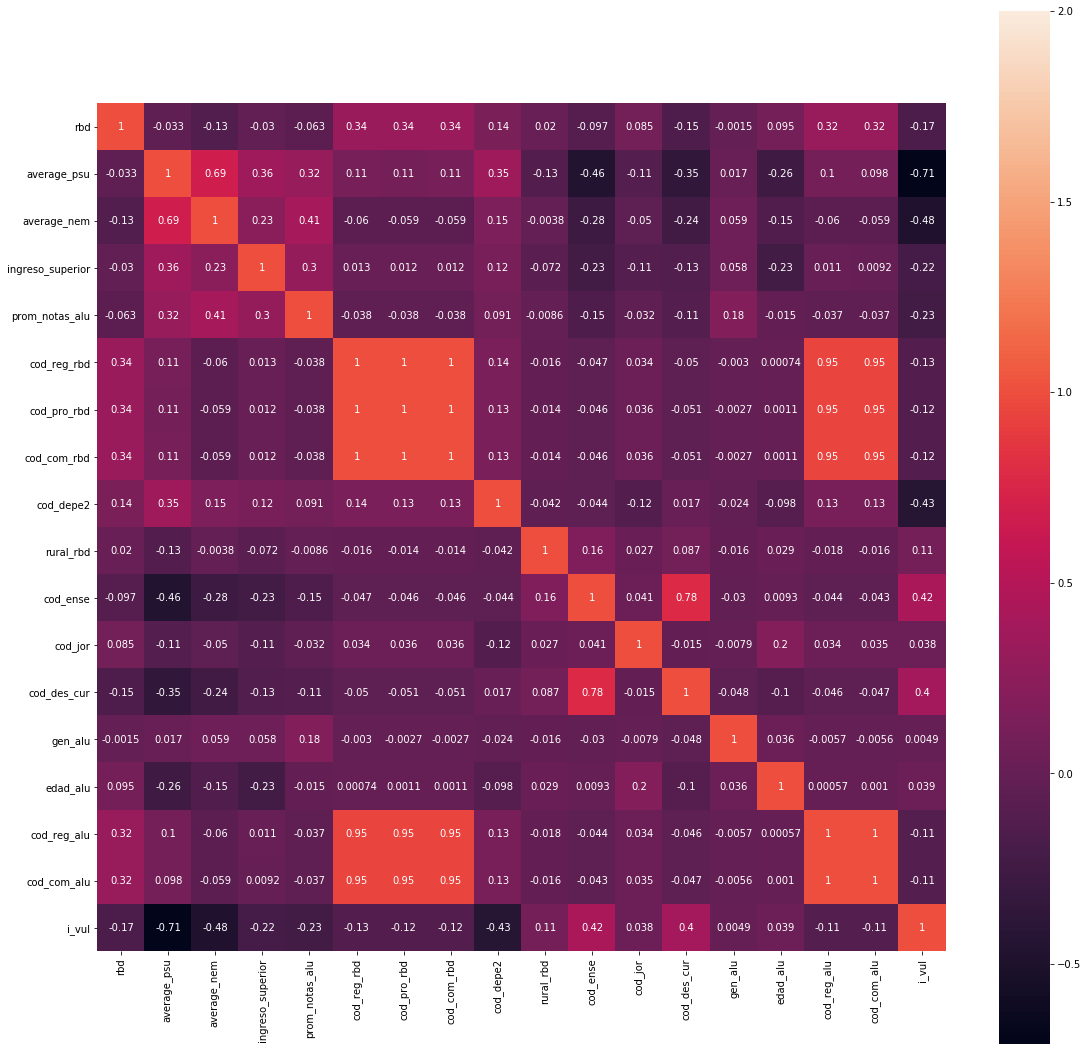

In [195]:
# Matriz de correlación:

corrmat = df.corr()
plt.figure(figsize=(19, 19))
sns.heatmap(corrmat, vmax=2,square=True, annot=True);

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [196]:
corrmat[['ingreso_superior']].sort_values(by = 'ingreso_superior',ascending = False)\
.style.background_gradient()

,ingreso_superior
ingreso_superior,1
average_psu,0.361596
prom_notas_alu,0.296529
average_nem,0.229929
cod_depe2,0.124328
gen_alu,0.058446
cod_reg_rbd,0.0134356
cod_com_rbd,0.0120282
cod_pro_rbd,0.0119904
cod_reg_alu,0.0106827


In [197]:
df.columns

Index(['rbd', 'average_psu', 'average_nem', 'ingreso_superior',
       'prom_notas_alu', 'cod_reg_rbd', 'cod_pro_rbd', 'cod_com_rbd',
       'cod_depe2', 'rural_rbd', 'cod_ense', 'cod_jor', 'cod_des_cur',
       'gen_alu', 'edad_alu', 'cod_reg_alu', 'cod_com_alu', 'i_vul'],
      dtype='object')

In [198]:
df_numerical=df[['average_psu', 'average_nem',
       'prom_notas_alu', 'edad_alu', 'i_vul']]

df_categorical=df[['rbd', 'cod_reg_rbd', 'cod_pro_rbd', 'cod_com_rbd',
       'cod_depe2', 'rural_rbd', 'cod_ense', 'cod_jor', 'cod_des_cur',
       'gen_alu', 'cod_reg_alu', 'cod_com_alu']]

df_2=df[['average_psu', 'average_nem', 'prom_notas_alu','cod_depe2', 
         'rural_rbd', 'cod_ense', 'cod_jor', 'cod_des_cur',
         'gen_alu', 'edad_alu', 'i_vul']]


In [199]:
def box_plot(df):
    cont=1
    plt.rcParams['figure.figsize'] = (20, 16)
    for i,j in df.iteritems():
        plt.subplot(6, 6, cont)
        sns.boxplot(j).set_title(i, size=14)
        cont+=1
        plt.tight_layout()
        

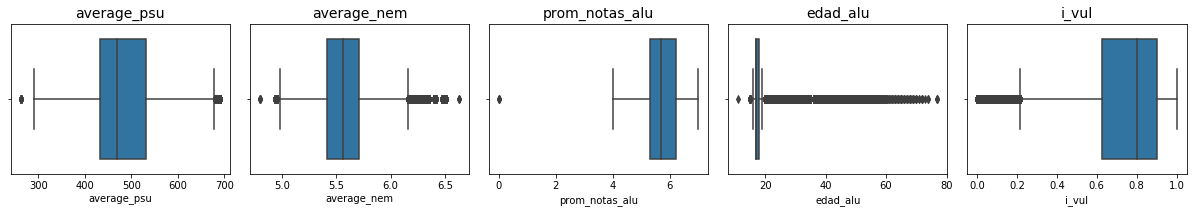

In [200]:
box_plot(df_numerical)

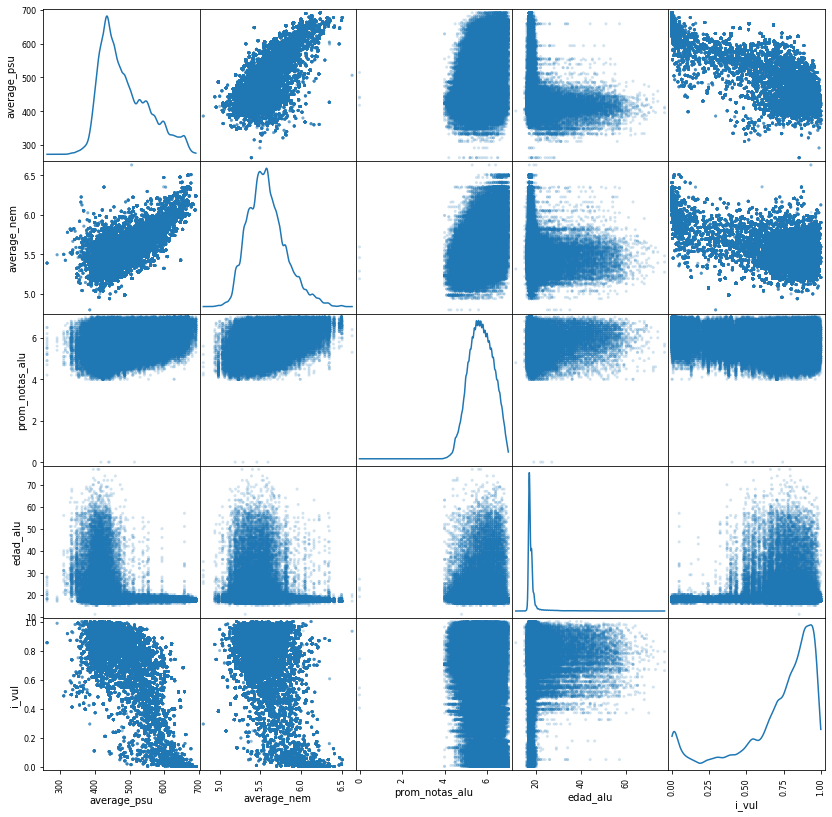

In [201]:
sm = scatter_matrix(df_numerical, alpha=0.2, figsize=(14, 14), diagonal='kde')

In [298]:
df_grouby=pd.concat([df["ingreso_superior"],df_numerical],axis=1)
for i in df_numerical.columns:
    print(df_grouby[[i,'ingreso_superior']].groupby('ingreso_superior').mean())

                  average_psu
ingreso_superior             
0.0                447.183628
1.0                501.978216
                  average_nem
ingreso_superior             
0.0                  5.498635
1.0                  5.614736
                  prom_notas_alu
ingreso_superior                
0.0                     5.467308
1.0                     5.835378
                   edad_alu
ingreso_superior           
0.0               19.809847
1.0               17.706875
                     i_vul
ingreso_superior          
0.0               0.801388
1.0               0.674982


In [330]:
for i in df_categorical.columns:
    print(df_categorical[i].value_counts())
    

25818    981
8485     631
5666     503
12870    486
2973     483
        ... 
6779       2
2057       1
14675      1
20277      1
31338      1
Name: rbd, Length: 3201, dtype: int64
13    88267
8     27203
5     24356
9     13530
7     12906
6     12031
10    11697
4     10749
2      8208
14     5334
1      4436
3      3850
15     3234
12     2149
11     1298
Name: cod_reg_rbd, dtype: int64
131    65618
81     12981
91     10788
51      9683
61      8301
132     7569
41      7322
84      6387
134     5783
101     5455
83      5348
21      5319
71      4898
58      4650
11      4150
136     3968
141     3872
73      3717
74      3619
103     3476
63      3392
151     3227
55      2834
133     2809
92      2742
102     2561
31      2540
135     2520
82      2487
22      2461
43      2333
57      2283
56      2252
121     1807
53      1524
142     1462
42      1094
54      1043
33       944
111      875
72       672
23       428
32       366
112      348
62       338
14       286
124      

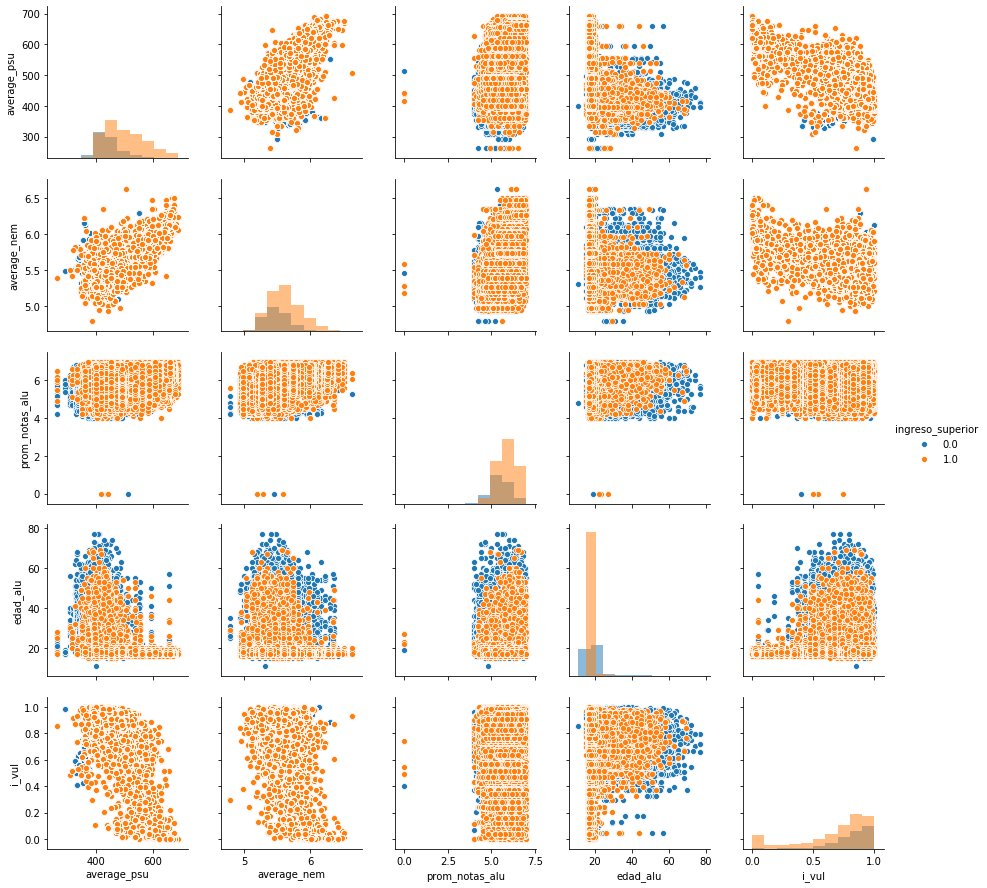

In [295]:
sns.pairplot(pd.concat([df["ingreso_superior"],df_numerical],axis=1),diag_kws= {'alpha': 0.5} ,hue="ingreso_superior", diag_kind='hist', vars=df_numerical.columns)

In [311]:
def dist_atributos(df):
    plt.figure(figsize=(20,40))
    plt.axis('square')
    plt.axis('equal')
    #plt.rcParams['figure.figsize']=(40,20)
    rows =len(df.columns); cols = 2
    for index, (colname, df) in enumerate(df.iteritems()):
        plt.subplot(rows, cols, index + 1)
        if pd.api.types.is_float_dtype(df) is True:
            mu, std = norm.fit(df)
            plt.title("Fit results: mu = %.2f,  std = %.2f" % (mu, std), fontsize=10)
            sns.distplot(df, fit=stats.norm)
            plt.title("Fit results: mu = %.2f,  std = %.2f" % (mu, std), fontsize=10)
        elif pd.api.types.is_integer_dtype(df) is True:
            sns.countplot(df,palette="Blues_d")
        elif pd.api.types.is_object_dtype(df) is True:
            plt.hist(df)  
        plt.title(colname, fontsize=10)
        plt.xlabel('');plt.ylabel('');#plt.tight_layout()
        

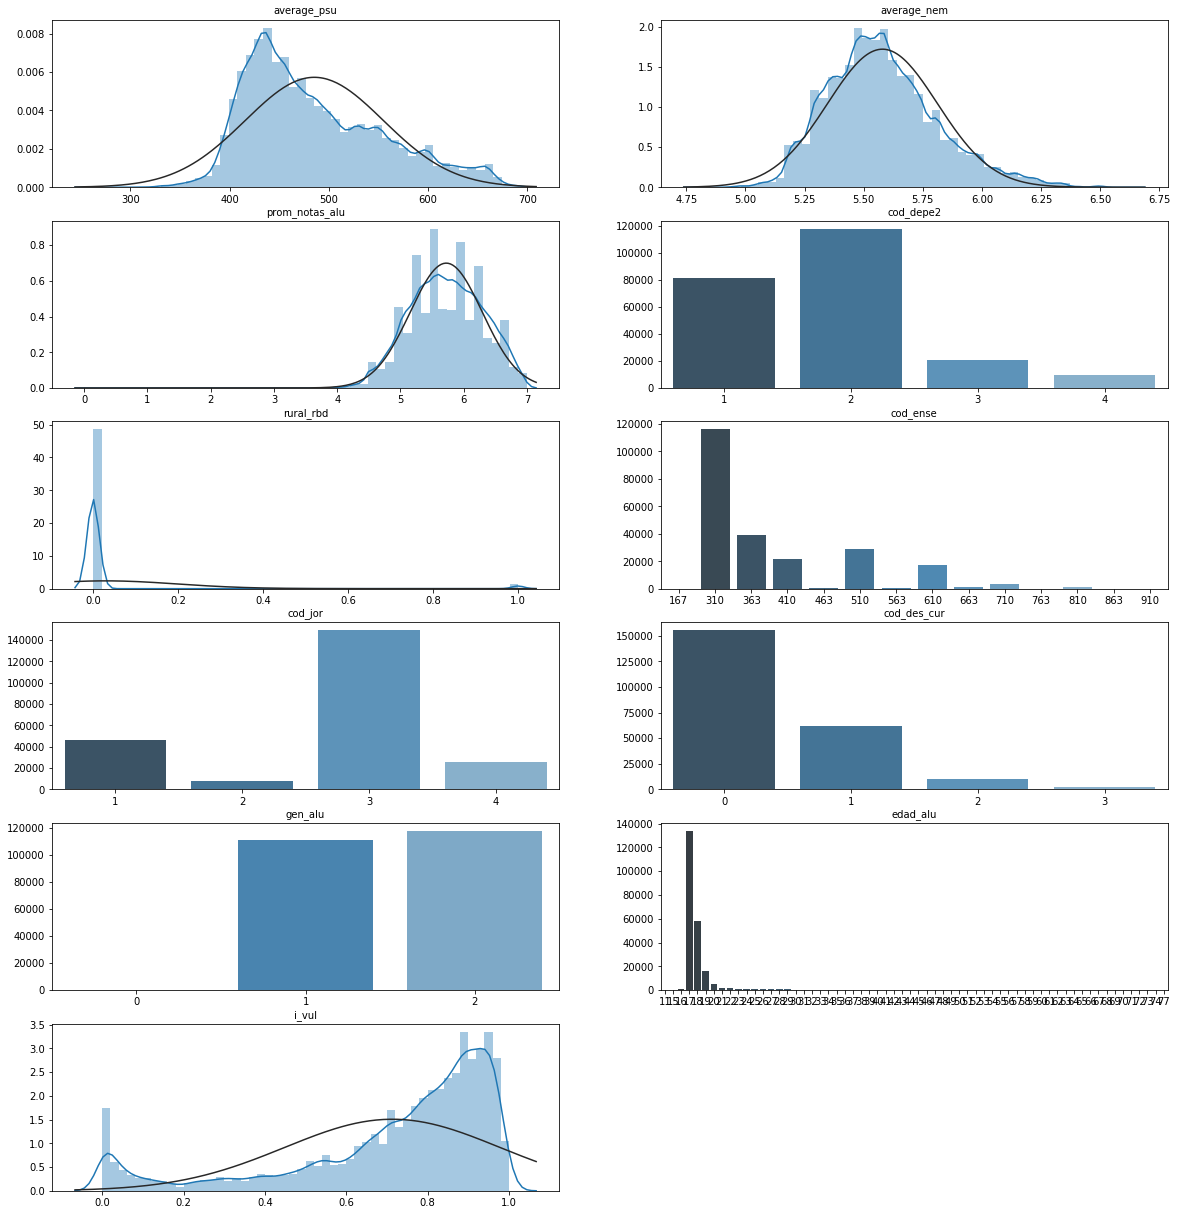

In [312]:
dist_atributos(df_2)

In [322]:
df_log=df_2
var_log=['average_psu', 'average_nem', 'prom_notas_alu','i_vul']
for i in var_log:
    df_log[i] = np.log(df_numerical[i]+0.000001)

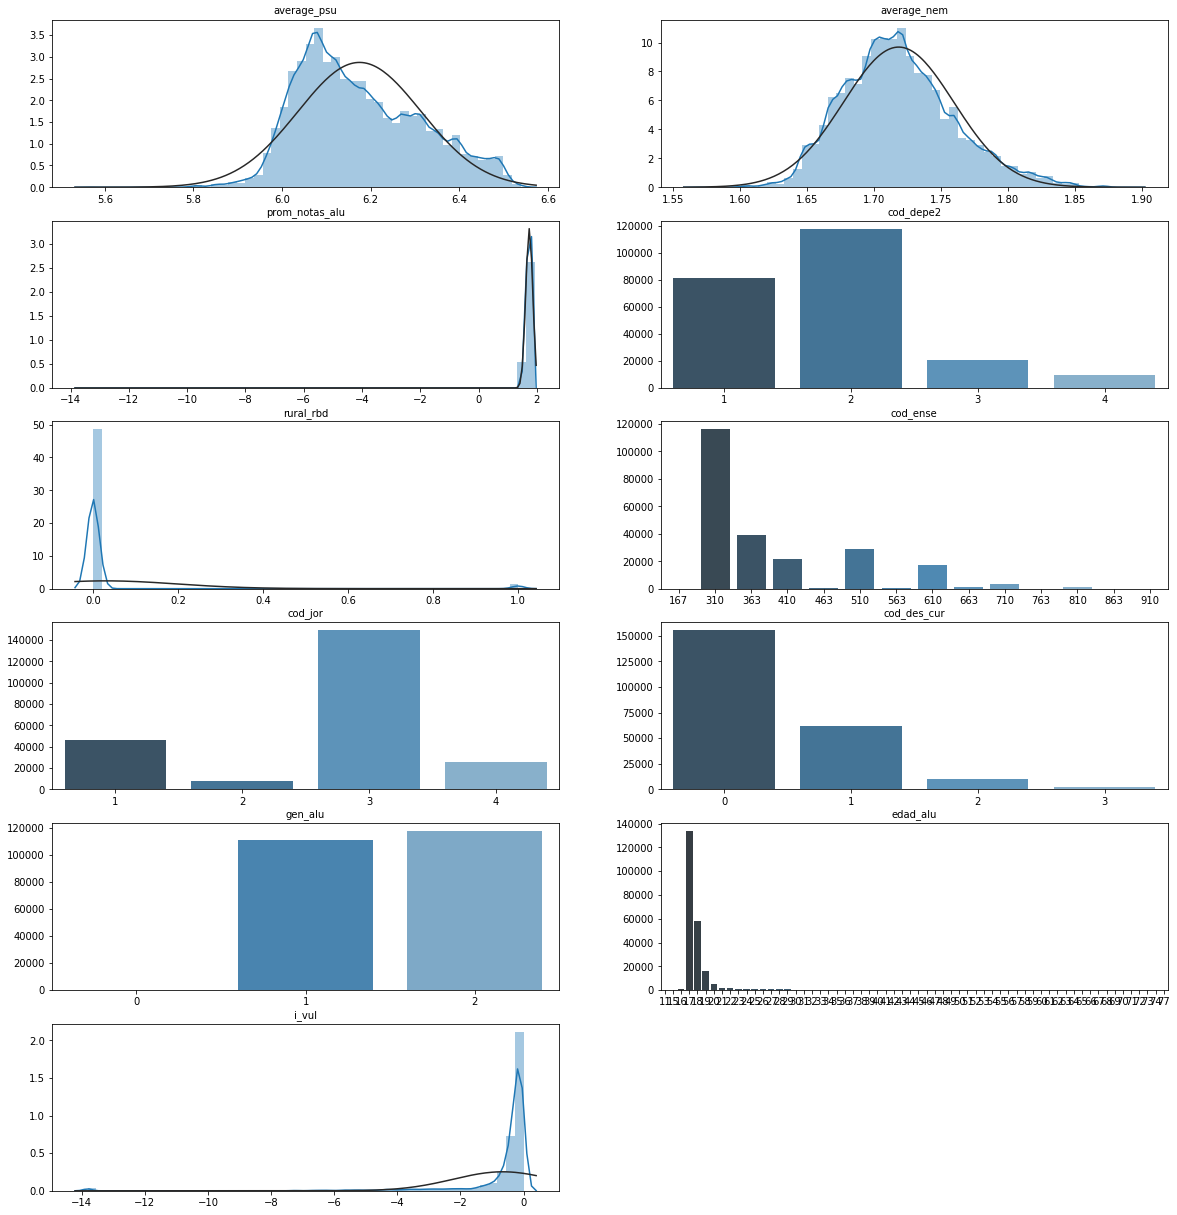

In [323]:
dist_atributos(df_log)

In [305]:
def dist_atributos(df,i):
    plt.rcParams['figure.figsize']=(20, 20)
    rows = 8; cols = (df.shape[1] / rows)+1
    for index, (colname, serie) in enumerate(df.iteritems()):
        plt.subplot(rows, cols, index + 1)
        serie1 = df[df[i] == 0][colname].dropna()
        serie2= df[df[i] == 1][colname].dropna()
        if pd.api.types.is_float_dtype(serie1) is True:
            sns.distplot(serie1)
            sns.distplot(serie2)
            plt.axvline(np.mean(serie1), color='purple')
            plt.axvline(np.mean(serie2), color='tomato')
        elif pd.api.types.is_integer_dtype(serie1) is True:
            sns.countplot(serie)
        plt.title(colname, fontsize=16)
        plt.xlabel('');plt.ylabel('');plt.tight_layout()

1. Normalidad - Cuando hablamos de normalidad lo que queremos decir es que los datos deben parecerse a una distribución normal. Es importante porque varias pruebas estadísticas se basan en esta suposición. Sólo voy a comprobar la normalidad de la variable 'SalePrice', aunque resulte un tanto limitado ya que no asegura la normalidad multivariable. Además, si resolvemos la normalidad evitamos otros problemas, como la homocedasticidad.
2. Homocedasticidad - La homocedasticidad se refiere a la suposición de que las variables dependientes tienen el mismo nivel de varianza en todo el rango de las variables predictoras, según (Hair et al., 2013). La homocedasticidad es deseable porque queremos que el término de error sea el mismo en todos los valores de las variables independientes.
3. Linealidad- La forma más común de evaluar la linealidad es examinar los diagramas de dispersión y buscar patrones lineales. Si los patrones no son lineales, valdría la pena explorar las transformaciones de datos. Sin embargo, no voy a entrar en esto porque la mayoría de los gráficos de dispersión que hemos visto parecen tener relaciones lineales.
4. Ausencia de errores correlacionados - Esto ocurre a menudo en series temporales, donde algunos patrones están relacionados en el tiempo. Tampoco voy a tocar este asunto.

In [ ]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(df_train['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)